# Plot Model Performance

In [1]:
import h5py
import pickle
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
!ls ../bin/model2

evaluation_data.h5  history_phase.pkl  model_phase
history_amp.pkl     model_amp	       normalizer.pkl


In [3]:
model = 'model_res'

In [4]:
with open(f'../bin/{model}/history_amp.pkl','rb') as f:
    history_amp = pickle.load(f)
with open(f'../bin/{model}/history_phase.pkl','rb') as f:
    history_phase = pickle.load(f)
with h5py.File(f'../bin/{model}/evaluation_data.h5','r') as f:
    Yreconst = f['Yreconst'][...]
    hpMMs = f['hpMMs'][...]
    hxMMs = f['hxMMs'][...]
with h5py.File('../bin/wf_test_data/wftestdata.h5','r') as f:
    X = f['X'][...]
    Y = f['Y'][...]

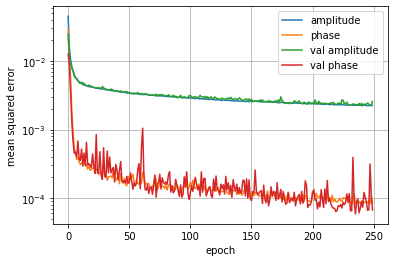

In [5]:
amp_losses = []
phase_losses = []
amp_val_losses = []
phase_val_losses = []
for i in range(len(history_amp)):
    amp_losses.extend(history_amp[i]['loss'])
    amp_val_losses.extend(history_amp[i]['val_loss'])
for i in range(len(history_phase)):
    phase_losses.extend(history_phase[i]['loss'])
    phase_val_losses.extend(history_phase[i]['val_loss'])

plt.semilogy(amp_losses,label='amplitude')
plt.semilogy(phase_losses,label='phase')
plt.semilogy(amp_val_losses,label='val amplitude')
plt.semilogy(phase_val_losses,label='val phase')
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.grid()
plt.legend()

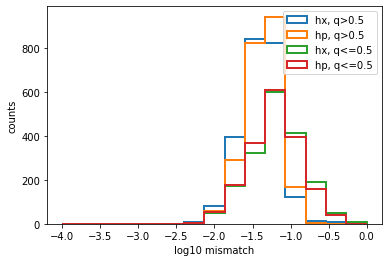

In [6]:
bins = np.linspace(-4,0,16)
sel = X[:,0]>0.5
plt.hist(np.log10(hxMMs)[sel],histtype='step',lw=2,label='hx, q>0.5',bins=bins)
plt.hist(np.log10(hpMMs)[sel],histtype='step',lw=2,label='hp, q>0.5',bins=bins)
sel = X[:,0]<=0.5
plt.hist(np.log10(hxMMs)[sel],histtype='step',lw=2,label='hx, q<=0.5',bins=bins)
plt.hist(np.log10(hpMMs)[sel],histtype='step',lw=2,label='hp, q<=0.5',bins=bins)
plt.xlabel('log10 mismatch')
plt.ylabel('counts')
plt.legend()

In [7]:
INTERP_GRID = np.logspace(1,3,500)
n_features = Yreconst.shape[1]
amp1_max_idx = n_features//4
amp2_max_idx = n_features//2
phase1_max_idx = amp1_max_idx + amp2_max_idx

def plot_reconst(i):
    fig,ax = plt.subplots(4,2,sharex=True,figsize=(9,12))
    ax[0,0].set_ylabel('h+ amp')
    ax[0,0].loglog(INTERP_GRID,Yreconst[i,:amp1_max_idx],label='reconstructed')
    ax[0,0].loglog(INTERP_GRID,Y[i,:amp1_max_idx],label='test set')
    ax[0,0].legend()
    
    ax[1,0].set_ylabel('h+ frac. err.')
    ax[1,0].loglog(INTERP_GRID,(Yreconst[i,:amp1_max_idx] - Y[i,:amp1_max_idx])/Y[i,:amp1_max_idx])
    
    ax[2,0].set_ylabel('hx amp')
    ax[2,0].loglog(INTERP_GRID,Yreconst[i,amp1_max_idx:amp2_max_idx],label='reconstructed')
    ax[2,0].loglog(INTERP_GRID,Y[i,amp1_max_idx:amp2_max_idx],label='test set')
    
    ax[3,0].set_ylabel('hx frac. err.')
    ax[3,0].loglog(INTERP_GRID,np.abs((Yreconst[i,amp1_max_idx:amp2_max_idx] - Y[i,:amp1_max_idx])/Y[i,:amp1_max_idx]))
    
    ax[0,1].set_ylabel('h+ phase')
    ax[0,1].semilogx(INTERP_GRID,Yreconst[i,amp2_max_idx:phase1_max_idx],label='reconstructed')
    ax[0,1].semilogx(INTERP_GRID,Y[i,amp2_max_idx:phase1_max_idx],label='test set')
    
    ax[1,1].set_ylabel('h+ phase err.')
    ax[1,1].semilogx(INTERP_GRID,Yreconst[i,amp2_max_idx:phase1_max_idx] - Y[i,amp2_max_idx:phase1_max_idx])
    
    ax[2,1].set_ylabel('hx phase')
    ax[2,1].semilogx(INTERP_GRID,Yreconst[i,phase1_max_idx:],label='reconstructed')
    ax[2,1].semilogx(INTERP_GRID,Y[i,phase1_max_idx:],label='test set')
    
    ax[3,1].set_ylabel('hx phase err.')
    ax[3,1].semilogx(INTERP_GRID,Yreconst[i,phase1_max_idx:] - Y[i,phase1_max_idx:])
    
    
    fig.suptitle('{}'.format(X[i,:]))
    fig.tight_layout()

    #hp_MM = calc_mismatch(Yreconst[i,:250],Yreconst[i,500:750],Y[i,:250],Y[i,500:750])
    #hx_MM = calc_mismatch(Yreconst[i,250:500],Yreconst[i,750:],Y[i,250:500],Y[i,750:])

    #print(hp_MM,hx_MM)


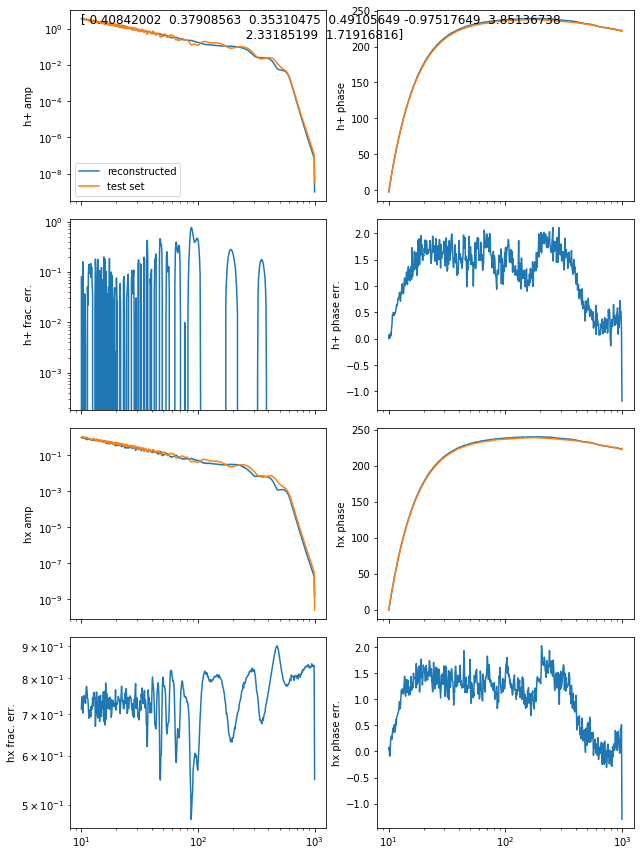

In [9]:
plot_reconst(294)